High specificity and low sensitivity in a binary classification model have the following implications:

High specificity: Specificity is the true negative rate, i.e., the proportion of negative cases correctly identified as negative. High specificity indicates that the model is good at identifying and correctly excluding negative cases. In other words, the model has a low false positive rate, meaning that it does not misclassify many negative cases as positive.

Low sensitivity: Sensitivity is the true positive rate, i.e., the proportion of positive cases correctly identified as positive. Low sensitivity indicates that the model is not as good at correctly identifying positive cases. In other words, the model has a high false negative rate, meaning that it misclassifies many positive cases as negative.

A model with high specificity and low sensitivity can be useful in situations where it is more important to avoid false positives than to detect all true positives. For example, in an initial screening test for a serious disease, you may want to avoid false positives that generate concern and unnecessary additional tests. However, the low sensitivity in this case also means that some real positive cases could go undetected.

In general, it is important to balance sensitivity and specificity according to the specific needs of the problem you are trying to solve. There is often a trade-off between these two metrics, and improving one may result in a decrease in the other. The choice of the appropriate balance point depends on the context and the consequences associated with false positives and false negatives.

In [26]:
import numpy as np

# Matriz de confusión 2x2
conf_matrix = np.array([[20, 5], [10, 30]])

# Calcular sensibilidad (tasa de verdaderos positivos)
sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0])

# Calcular especificidad (tasa de verdaderos negativos)
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 0.6666666666666666
Specificity: 0.8571428571428571


In [27]:
import numpy as np

# Matriz de confusión 3x3
conf_matrix = np.array([[25, 5, 2], [3, 20, 4], [1, 6, 30]])

# Función para calcular sensibilidad y especificidad para cada clase
def sensitivity_specificity(conf_matrix, class_index):
    tp = conf_matrix[class_index, class_index]
    fn = conf_matrix[:, class_index].sum() - tp
    fp = conf_matrix[class_index, :].sum() - tp
    tn = conf_matrix.sum() - (tp + fn + fp)

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return sensitivity, specificity

# Calcular sensibilidad y especificidad para cada clase
for class_index in range(conf_matrix.shape[0]):
    sensitivity, specificity = sensitivity_specificity(conf_matrix, class_index)
    print(f"Class {class_index + 1}:")
    print(f"  Sensitivity: {sensitivity}")
    print(f"  Specificity: {specificity}")


Class 1:
  Sensitivity: 0.8620689655172413
  Specificity: 0.8955223880597015
Class 2:
  Sensitivity: 0.6451612903225806
  Specificity: 0.8923076923076924
Class 3:
  Sensitivity: 0.8333333333333334
  Specificity: 0.8833333333333333


<b>ROC:</b> is is a graph that gives a representation of how the thresholds behaves in a logistic system to classify something between 2 classes
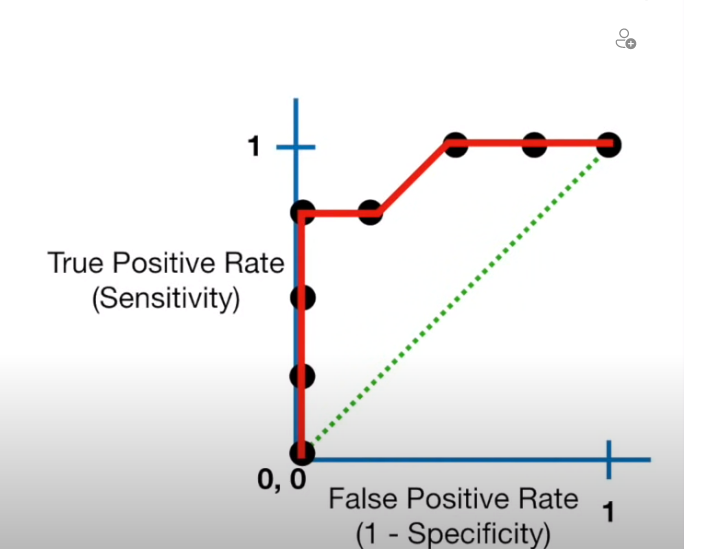 as it can be seen the axis represent true positives and true negatives amounts or percents of accuracy. the auc is the area under the curve and it is useful to compare different machine learning solutions, wins the one with bigger area 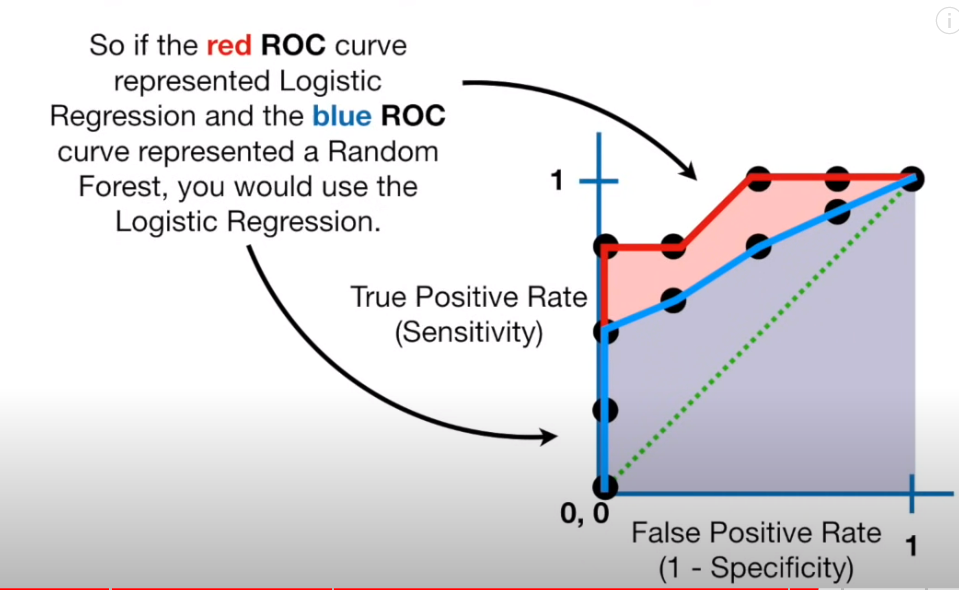

<b>Multicollinearity Problem:</b>

Multicollinearity is a term used in the context of multiple regression analysis to describe a situation where two or more predictor variables (also called independent variables or features) in a regression model are highly correlated with each other. This high correlation between predictor variables can cause problems in estimating the regression coefficients and interpreting the model.

When multicollinearity is present, it becomes difficult to determine the individual effect of each predictor variable on the dependent variable, as their effects are intertwined. This can lead to:

 1. Unreliable and unstable estimates of the regression coefficients: Small changes in the data can result in large changes in the estimated coefficients.
 2. Difficulty in interpreting the model: It becomes challenging to identify which predictor variable is truly important or has a significant effect on the dependent variable.
 3. Increased standard errors of the coefficients: This can lead to wider confidence intervals and make it difficult to identify statistically significant relationships between predictor variables and the dependent variable.
 
It's important to note that multicollinearity doesn't affect the overall predictive accuracy of the model, but it can make it difficult to understand and interpret the individual contributions of each predictor variable. In such cases, using techniques like Ridge Regression or Lasso Regression can help address the multicollinearity issue by adding a regularization term that penalizes large coefficients, resulting in a more interpretable model.

<b>Ridge Regressionm:</b>

Ridge Regression is a linear regression technique that addresses the issue of multicollinearity in datasets by adding a regularization term to the objective function (the mean squared error in the case of linear regression). The regularization term, which is the L2 norm of the coefficients, helps to avoid overfitting by penalizing large coefficients. This makes Ridge Regression particularly useful when there are many correlated features in the dataset.

Advantages of Ridge Regression:

    1. It helps to reduce overfitting by penalizing large coefficients.
    2. It can handle multicollinearity, i.e., high correlation between predictor variables.
    3. It can provide a more stable solution than ordinary least squares (OLS) regression when the features are not orthogonal (independent).



Training MSE: 0.774954670876817
Test MSE: 0.49686759287999027


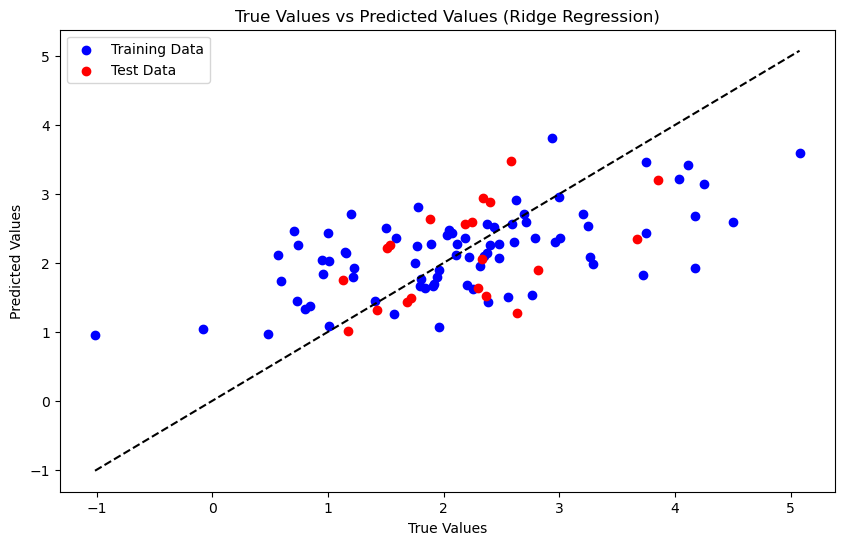

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 10)
y = np.dot(X, np.random.rand(10)) + np.random.normal(0, 1, 100)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression model
alpha = 1.0  # Regularization parameter
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# Evaluate the model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Training MSE:", mse_train)
print("Test MSE:", mse_test)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
plt.scatter(y_test, y_pred_test, color='red', label='Test Data')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='black')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values (Ridge Regression)')
plt.legend()
plt.show()


<b>Ridge regression math:</b>

Ridge Regression is a variant of linear regression that introduces an L2 regularization term to the objective function (the mean squared error in the case of linear regression). The regularization term helps to penalize large coefficients, which can help reduce overfitting and handle multicollinearity.

For a linear regression problem with 3 input properties (features), the model can be represented as:

y = β0 + β1 * x1 + β2 * x2 + β3 * x3

where y is the predicted output, x1, x2, and x3 are the input features, and β0, β1, β2, and β3 are the coefficients to be estimated.

In Ridge Regression, we aim to minimize the following objective function:

L(β) = Σ(yi - (β0 + β1 * x1i + β2 * x2i + β3 * x3i))^2 + λ(β1^2 + β2^2 + β3^2)

where:

1. L(β) is the objective function to be minimized
2. i is the index of the data points (i.e., i = 1, 2, ..., N, where N is the number of data points)
3. yi is the true output value for data point i
4. x1i, x2i, and x3i are the values of the input features for data point i
5. λ is the regularization parameter (a non-negative value), which controls the amount of regularization applied. Larger values of λ result in more regularization and smaller coefficients, while smaller values of λ result in less regularization and potentially larger coefficients.

The objective function consists of two parts:

The mean squared error (MSE) term: Σ(yi - (β0 + β1 * x1i + β2 * x2i + β3 * x3i))^2
The L2 regularization term: λ(β1^2 + β2^2 + β3^2)
Ridge Regression aims to find the coefficients β0, β1, β2, and β3 that minimize this objective function. Note that the regularization term does not include β0, as it is the intercept term and not associated with any input features.

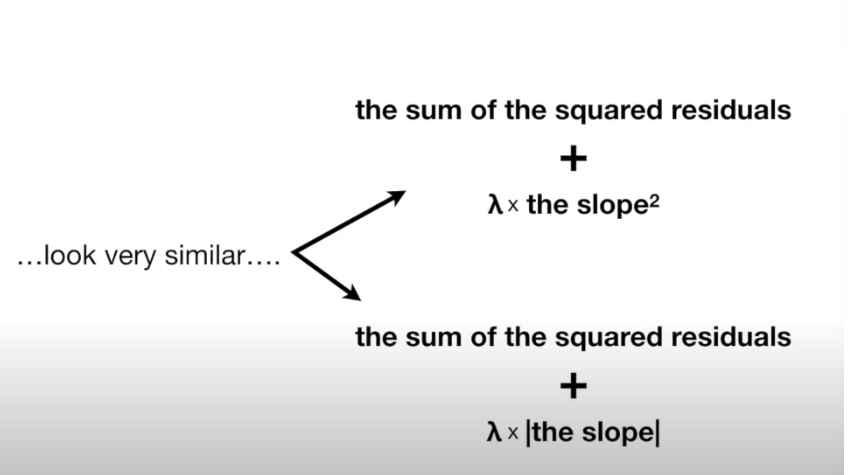

those are the formula of ridge and laso regression

<b>PCA</b>

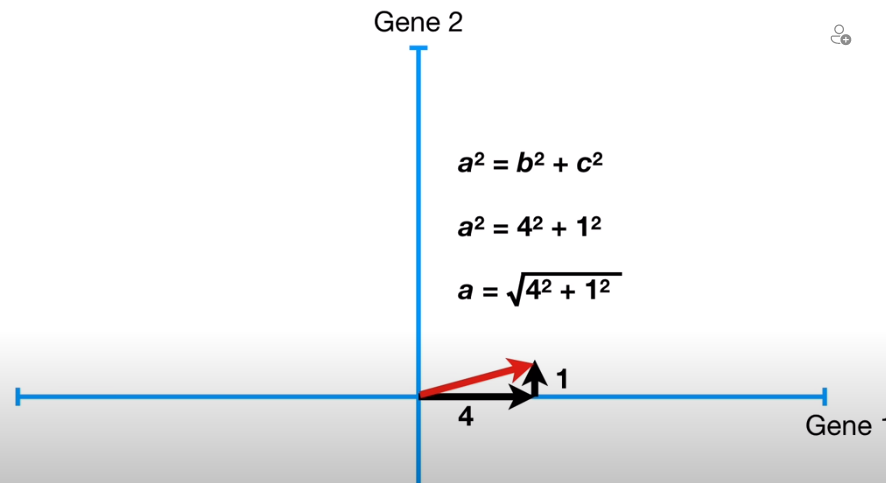

it tries to minimize b , in the case of the image b is 1 a is 4.12 a c is 4

if we divide every one over 4.12 so we get a vector of unit 1, and we can measure the "weights" of the vector 

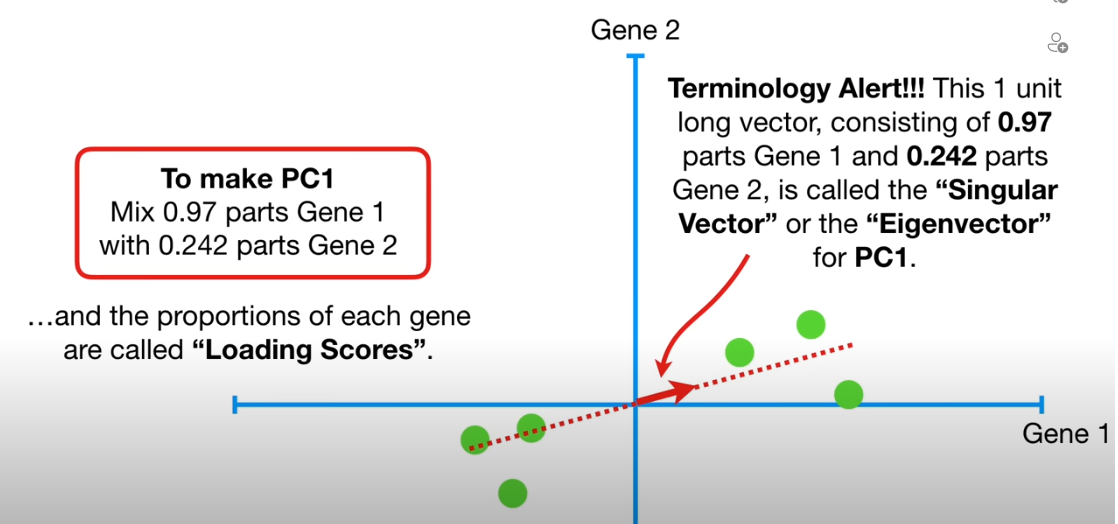

<b>LDA</b>

Reduction of dimensions

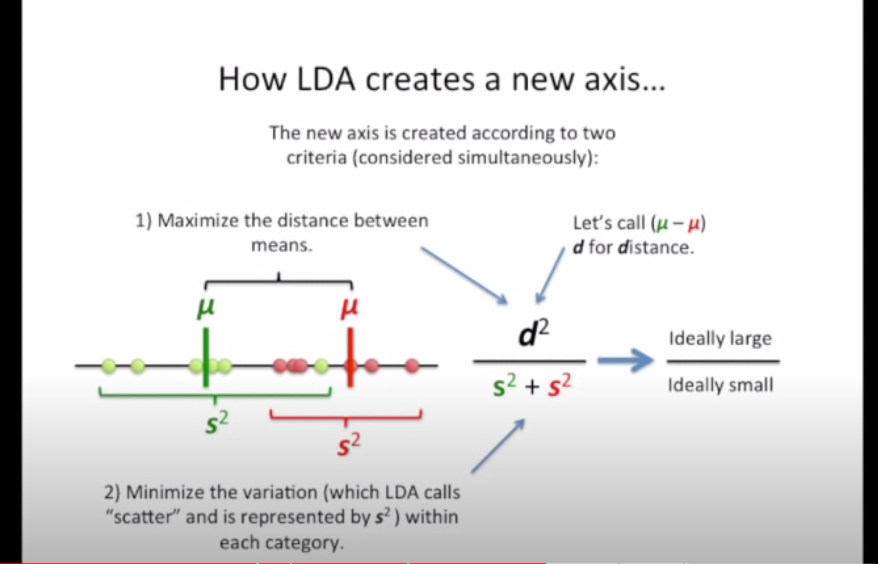

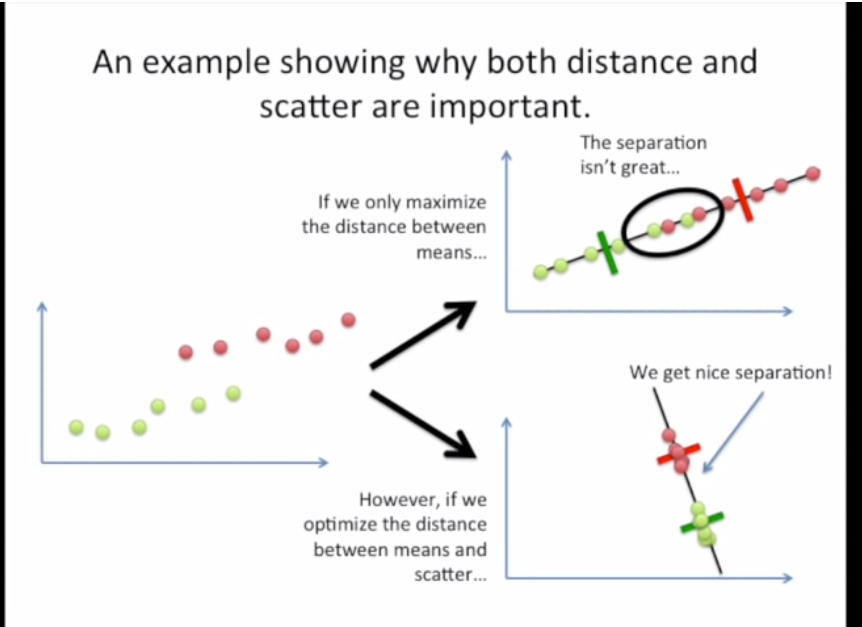

maximize the mean and minimize the scatter 

<b>MDS AND PCOA</b>

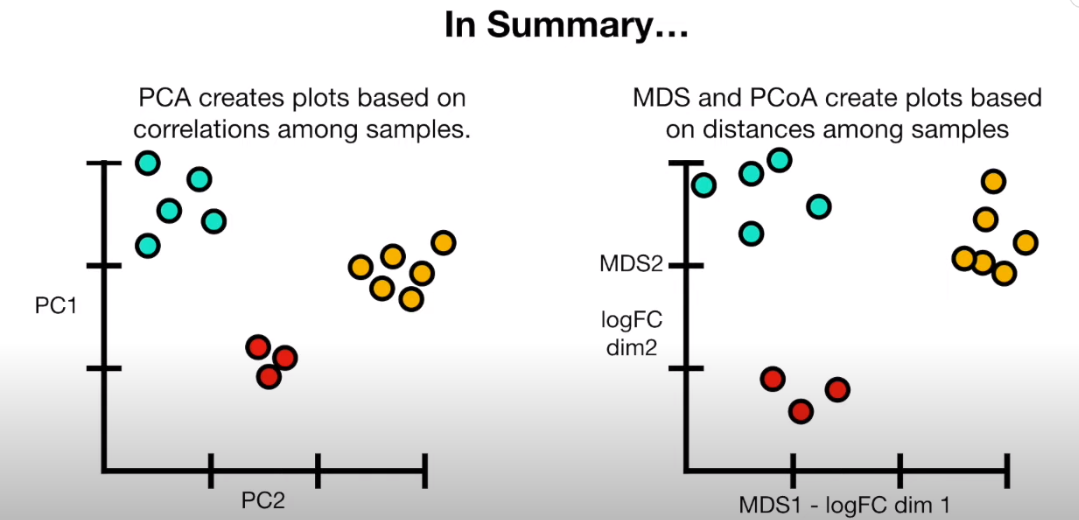

<b>T-SNE</b>

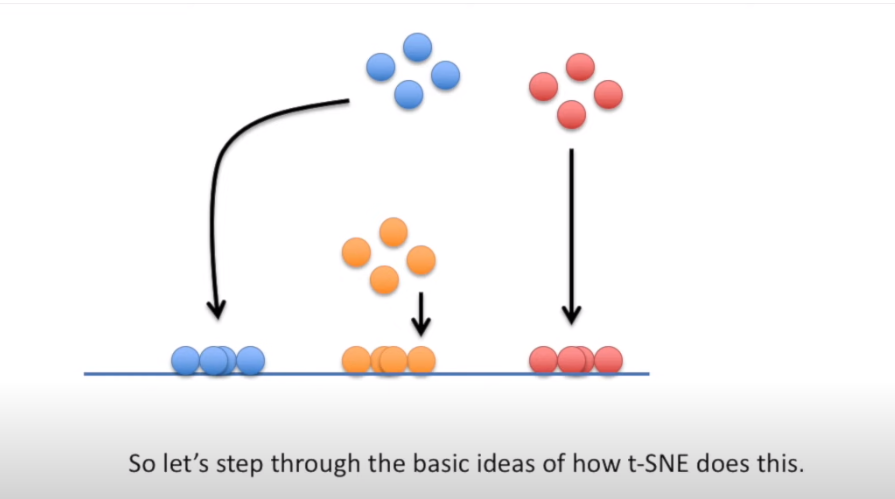

Cast the data into a dimension but without meshing the info, we could say that it do it in a "smart way"

for do it uses an algorythm that plot the distances in a "normal curve"

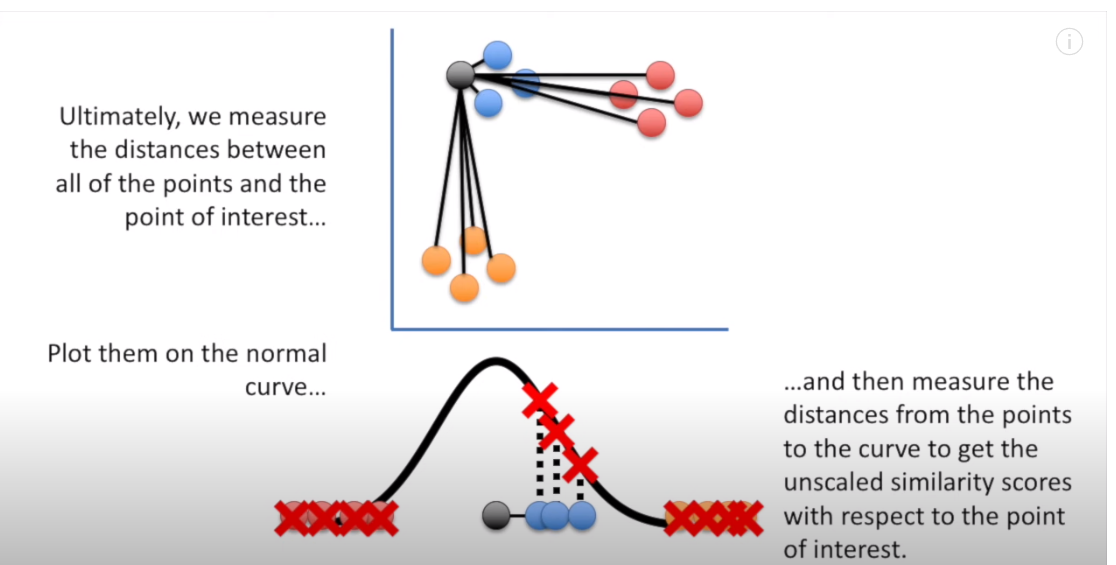


In [29]:
#PCA in code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [30]:
#Load the Iris dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(feature_names)
print(target_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


<b>Standardize the data:</b>
PCA is sensitive to the scale of the features, so it's a good practice to standardize the data. Standardization transforms the data so that each feature has a mean of 0 and a standard deviation of 1.
Mathematically, the standardization formula is as follows:

<code>z = (x - μ) / σ</code>

where x is the original data, μ is the mean of the data, and σ is the standard deviation.

In [31]:
"""Standardize the data:
PCA is affected by the scale of the features, so it's a good practice to standardize the data to have a mean of 0 and a standard deviation of 1."""
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X_standardized[0,0:10])
print(X[0,0:10])


[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
[5.1 3.5 1.4 0.2]


<b>Calculate the covariance matrix:</b>
The covariance matrix provides information on the correlation between each pair of features in the dataset. The covariance between two features X and Y is calculated as:

<code>cov(X, Y) = Σ((X - μ_X) * (Y - μ_Y)) / (n - 1)</code>

where n is the number of data points, and μ_X and μ_Y are the means of features X and Y, respectively.

In [32]:
"""Calculate the covariance matrix:
The covariance matrix helps to understand how different features in the dataset are related to each other."""
cov_matrix = np.cov(X_standardized.T)
print(cov_matrix)
#The diagonal means the variance the others the covariance respect the other columns, if it is negative if one up the other down

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<b>Calculate the eigenvectors and eigenvalues of the covariance matrix:</b>
Eigenvectors and eigenvalues are essential components of PCA. The eigenvectors represent the directions of the maximum variance in the dataset, while the eigenvalues indicate the magnitude of the variance in these directions. Mathematically, for a matrix A and a scalar λ, an eigenvector v and eigenvalue λ satisfy the following equation:

<code>A * v = λ * v</code>


In [33]:
"""Calculate the eigenvectors and eigenvalues of the covariance matrix:
Eigenvectors represent the directions of the maximum variance in the data, while eigenvalues represent the magnitude of the variance in these directions."""
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


<b>Sort the eigenvectors by their corresponding eigenvalues in descending order:</b>
The eigenvectors corresponding to the largest eigenvalues capture the most variance in the data. By sorting the eigenvectors in descending order of their eigenvalues, we can choose the top k eigenvectors to reduce the dimensionality of the dataset while preserving the most information.

<b>Select the top k eigenvectors:</b>
Choose the top k eigenvectors corresponding to the k largest eigenvalues. These eigenvectors will define the new feature space with reduced dimensionality.

<b>Transform the original data using the selected eigenvectors:</b>
Project the original standardized data onto the new feature space created by the top k eigenvectors. Mathematically, this can be represented as:

<code>X_pca = X_standardized * W</code>

where X_standardized is the standardized data and W is a matrix containing the top k eigenvectors.

By following these steps, we can reduce the dimensionality of the dataset while preserving the majority of the information (variance) contained in it.

#Sort the eigenvectors by their corresponding eigenvalues in descending order:
eig_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print(eig_pairs)

In [34]:
"""Select the top k eigenvectors:
Choose the top k eigenvectors corresponding to the k largest eigenvalues. In this example, we'll keep the top 2 eigenvectors."""
k = 2
top_k_eigenvectors = np.array([pair[1] for pair in eig_pairs[:k]]).T
print(top_k_eigenvectors)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [35]:
"""Transform the original data using the selected eigenvectors:
This step projects the original data onto the new feature space created by the top k eigenvectors."""
X_pca_manual = X_standardized.dot(top_k_eigenvectors)
#print(X_pca_manual)

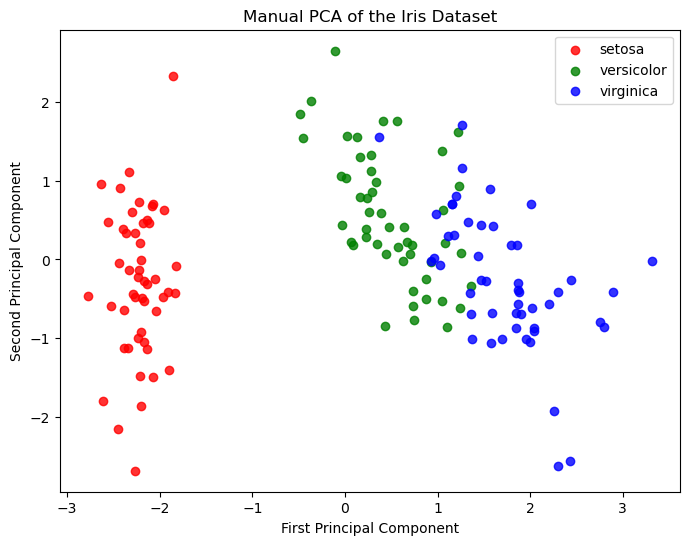

In [36]:
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['r', 'g', 'b'], [0, 1, 2], target_names):
    plt.scatter(X_pca_manual[y == i, 0], X_pca_manual[y == i, 1], color=color, alpha=0.8, label=target_name)

plt.legend(loc='best')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Manual PCA of the Iris Dataset')
plt.show()

 When the variance of the data is maximized, it means that the data points are more scattered with respect to the mean. In other words, the data points are spread out over a larger range in that specific direction.

In PCA, we aim to find the directions (eigenvectors) where the data has the highest variance because these directions contain the most information about the structure of the dataset. By projecting the data onto these principal components, we can reduce the dimensionality while preserving as much information as possible.

The eigenvectors of the covariance matrix indicate the directions of maximum variance in the dataset, and the associated eigenvalues represent the magnitude of the variance in those directions. By selecting the eigenvectors with the largest eigenvalues, we capture the directions that have the most significant contribution to the total variance in the dataset, and thus, we can better represent the structure of the original high-dimensional data in a lower-dimensional space.

for that reason we choose the top k eigenvectors

In [37]:
#LDA in code
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [39]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(feature_names)
print(target_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


<b>Standardize the data:</b>
LDA is also affected by the scale of the features, so it's a good practice to standardize the data to have a mean of 0 and a standard deviation of 1. The standardization formula is:

<code>z = (x - μ) / σ</code>

where x is the original data, μ is the mean of the data, and σ is the standard deviation.

In [43]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized[0,0:10])
print(X[0,0:10])

[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
[5.1 3.5 1.4 0.2]


<b>Calculate the mean vectors for each class:</b>

The mean vector for each class is the average of all the data points belonging to that class. It is calculated as:

<code>mean_i = Σ(x_i) / n_i</code>
where x_i are the data points belonging to class i, and n_i is the number of data points in class i.

<b>Compute the within-class scatter matrix (S_W):</b>

The within-class scatter matrix is the sum of the scatter matrices for each individual class. It represents the dispersion of the data points within each class. The scatter matrix for each class i is calculated as: (the outer product is the outer product between the vectors)

<code>S_W_i = Σ(x - mean_i) * (x - mean_i).T</code>

Then, the within-class scatter matrix is the sum of the scatter matrices for all classes:

<code>S_W = Σ(S_W_i)</code>

<b>Compute the between-class scatter matrix (S_B):</b>

The between-class scatter matrix represents the dispersion between the different classes' mean vectors. It is calculated as:

<code>S_B = Σ(n_i * (mean_i - mean_total) * (mean_i - mean_total).T)</code>

where mean_total is the overall mean vector, and n_i is the number of data points in class i.

<b>Calculate the eigenvectors and eigenvalues of the matrix S_W_inv * S_B:</b>
                           
Compute the inverse of the within-class scatter matrix and multiply it by the between-class scatter

below the definition

<code>A * A_inv = A_inv * A = I</code>

<code>S_W * S_W_inv = S_W_inv * S_W = I</code>

Multiply the inverse of S_W by the between-class scatter matrix (S_B):
Once we have S_W_inv, we can multiply it by the between-class scatter matrix S_B. The product of the two matrices is denoted as S_W_inv_S_B:

<code>S_W_inv_S_B = S_W_inv * S_B</code>

Calculate the eigenvectors and eigenvalues of the resulting matrix:
To find the eigenvectors and eigenvalues of the matrix S_W_inv_S_B, we need to solve the following eigenvalue equation:

<code>S_W_inv_S_B * v = λ * v</code>

The rest of the proccess in known select k top values of eigen vectors and reduce dimensions



In [41]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_standardized, y)

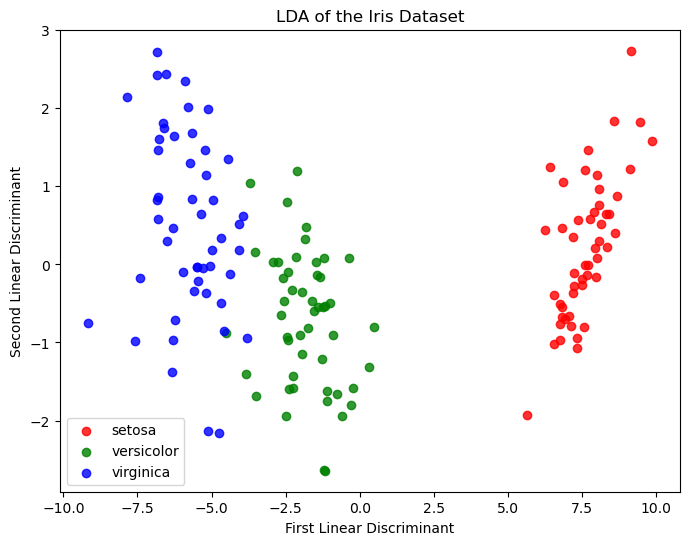

In [42]:
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['r', 'g', 'b'], [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=0.8, label=target_name)

plt.legend(loc='best')
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.title('LDA of the Iris Dataset')
plt.show()


Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are both dimensionality reduction techniques, but they have different objectives and underlying assumptions.

Main differences between LDA and PCA:

Objective:

LDA: LDA is a supervised technique that aims to maximize the separation between multiple classes in a dataset. It reduces dimensionality by creating new axes (linear discriminants) that maximize the distance between the centroids of different classes while minimizing the within-class scatter.
PCA: PCA is an unsupervised technique that aims to capture the maximum amount of variance in a dataset. It reduces dimensionality by creating new orthogonal axes (principal components) that explain the maximum variance in the data, without considering class labels.
Supervised vs Unsupervised:

LDA: Supervised learning method that requires labeled data, as it takes class information into account.
PCA: Unsupervised learning method that does not require labeled data, as it does not consider class information.
Assumptions:

LDA: Assumes that the data is normally distributed, and that the covariance matrices for each class are equal.
PCA: Makes no assumptions about the data distribution or covariance matrices.
Use cases:

LDA: Particularly useful for classification tasks, as it preserves class separability.
PCA: Useful for exploratory data analysis, noise reduction, and visualization of high-dimensional data.
In summary, LDA is a supervised method that focuses on maximizing class separability, while PCA is an unsupervised method that focuses on capturing maximum variance in the data.

In [44]:
#tsn-e in code
from sklearn.manifold import TSNE

In [45]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


<b>Compute pairwise affinities P_ij using Gaussian distribution:</b>

t-SNE starts by calculating pairwise affinities P_ij, which represent the similarity between points in the high-dimensional space. For each pair of data points x_i and x_j, a conditional probability P_ij is computed:

<code>P_ij = exp(-||x_i - x_j||^2 / 2σ_i^2) / Σ(exp(-||x_i - x_k||^2 / 2σ_i^2))</code>

where σ_i is the variance of the Gaussian distribution centered at x_i.

The goal is to find a σ_i for each data point x_i such that the perplexity of the conditional distribution P_ij matches a predefined perplexity value.

<b>Note:</b>

This is euclidean distance

<code>||x_i - x_j|| = sqrt((x_i1 - x_j1)^2 + (x_i2 - x_j2)^2 + ... + (x_in - x_jn)^2)</code>

and exp is  e^x

<b>Define the Student's t-distribution for low-dimensional space:</b>

t-SNE uses a Student's t-distribution with one degree of freedom (also called the Cauchy distribution) to measure the similarity between points in the low-dimensional space. For each pair of low-dimensional points y_i and y_j, the similarity measure Q_ij is calculated as:

<code>Q_ij = (1 + ||y_i - y_j||^2)^-1 / Σ(1 + ||y_i - y_k||^2)^-1</code>

Minimize the divergence between P_ij and Q_ij:
t-SNE minimizes the Kullback-Leibler (KL) divergence between the P_ij and Q_ij distributions using gradient descent:

<code>C = Σ(P_ij * log(P_ij / Q_ij))</code>

<b>Tune hyperparameters:</b>

t-SNE has several hyperparameters, such as the number of components, perplexity, and learning rate. You may need to experiment with these hyperparameters to find the best visualization for your data.



In [46]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


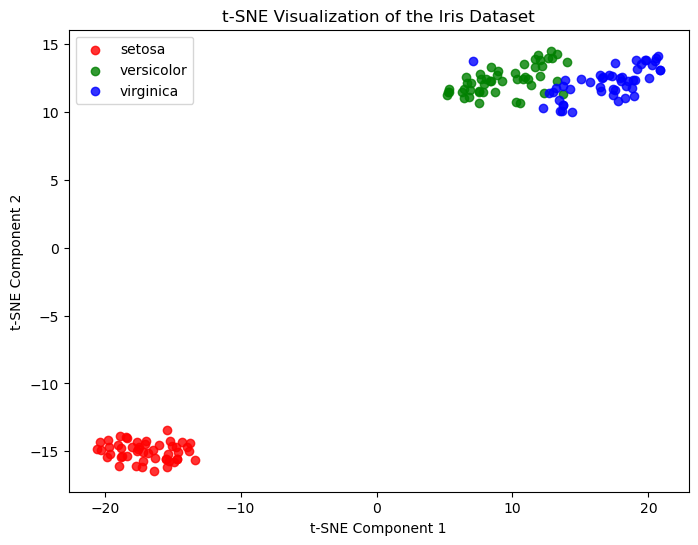

In [47]:
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['r', 'g', 'b'], [0, 1, 2], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, alpha=0.8, label=target_name)

plt.legend(loc='best')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of the Iris Dataset')
plt.show()

<b>Here are some key points about t-SNE:</b>

Objective: t-SNE aims to preserve the local structure of data points in the high-dimensional space while reducing the dimensions. It does so by minimizing the divergence between two probability distributions: one that represents pairwise similarities in the original high-dimensional space and the other that represents pairwise similarities in the low-dimensional space.

Non-linear: Unlike LDA and PCA, which are linear techniques, t-SNE is a non-linear dimensionality reduction technique. This allows t-SNE to capture complex relationships and structures in the data that linear methods might not reveal.

Visualization: t-SNE is primarily used for visualization purposes, as it tends to produce meaningful and interpretable two- or three-dimensional representations of high-dimensional data.

Stochastic: As the name suggests, t-SNE is a stochastic technique, meaning it introduces randomness in the optimization process. This can lead to different results each time the algorithm is run. However, this randomness often helps in avoiding local minima during optimization.

Computational complexity: t-SNE has a higher computational complexity compared to LDA and PCA, making it less suitable for extremely large datasets. However, recent improvements in the algorithm and its implementation have made it more efficient for moderately large datasets.

In summary, t-SNE is a non-linear, stochastic dimensionality reduction technique mainly used for visualization purposes. It preserves local structure in the data and is particularly useful for exploring and understanding complex high-dimensional datasets.

Non linear means that there is not proportional relationship between the vars.

https://www.jmlr.org/papers/v9/vandermaaten08a.html